In [3]:
import pandas as pd

In [4]:
# Define the file path
modeling_file_path = "/Users/praveenpuviindran/Documents/Current Course Material/DATA481S25/Virology-DATA481/KSV_Gex_Reduced.csv"
# Load the CSV file into a DataFrame
df_modeling = pd.read_csv(modeling_file_path)
# Set 'SampleID' as the index
df_modeling.set_index('SampleID', inplace=True)

# Define the file path
correlations_file_path = "/Users/praveenpuviindran/Documents/Current Course Material/DATA481S25/Virology-DATA481/average_correlation_matrix.csv"
# Load the CSV file into a DataFrame
df_correlations = pd.read_csv(correlations_file_path)

# Define the file path
distances_file_path = "/Users/praveenpuviindran/Documents/Current Course Material/DATA481S25/Virology-DATA481/average_gene_distance_matrix.csv"
# Load the CSV file into a DataFrame
df_distances = pd.read_csv(distances_file_path)

In [5]:
df_modeling

,Cluster,K1,K3,Orf70,K4,K5,K7,Orf16,Orf17,Orf18,...,Orf65,Orf66,Orf67,Orf68,Orf69,LANA,K14,Orf11,K15,K2
SampleID,,,,,,,,,,,,,,,,,,,,,
180,1,-1.415987,-0.733408,-2.356423,-2.755006,-2.341402,-2.555724,-5.406533,1.120814,-3.364880,...,-11.893126,-6.748318,-6.743363,-0.159173,2.855573,-1.528707,-5.867100,-7.532113,-0.858643,0.474952
220,1,-1.415987,3.689511,-2.356423,-2.968253,7.777975,-14.070594,-5.406533,-3.939122,7.339368,...,-6.034372,-8.609888,-4.784115,0.436870,-17.939168,-11.409154,-5.605035,-8.962736,-7.291090,-7.034789
225,1,-0.230971,-2.868305,-1.171407,-1.783236,-4.401256,-1.225577,-4.221517,-2.754105,-2.179863,...,-13.327850,-2.688942,-5.558347,4.542639,-1.259151,3.769465,2.906796,-3.141967,3.912528,-5.849773
316,2,-1.415987,4.446147,8.172779,8.500950,5.727930,13.578608,5.408068,1.370480,-3.364880,...,7.776335,3.445358,-3.628762,1.032224,4.660035,-1.106110,1.754931,8.037219,-1.586967,8.304413
541,1,-0.439120,-1.409788,-2.356423,-1.024719,5.249028,-2.225293,-5.406533,-0.391321,-3.364880,...,-2.882266,-2.636472,-2.768063,-0.393743,-6.438867,1.091869,-5.371745,4.498618,-0.826127,3.635812
1167,2,-1.415987,9.716846,10.150411,4.285248,5.165561,11.311240,5.571884,7.720212,-3.364880,...,8.973967,0.626637,4.830054,-3.420627,5.837666,2.185916,1.002300,6.714851,4.408979,6.202045
1338,2,-1.415987,-4.053321,-2.356423,-2.968253,5.109810,9.725488,13.189549,8.150440,-3.364880,...,7.153215,-2.661352,1.694678,-0.996656,7.291915,5.470923,7.075362,6.554099,0.771161,8.521293
1347,1,-1.415987,-4.053321,-2.356423,-2.968253,-1.293588,-5.487909,-0.613848,-3.939122,-3.364880,...,7.662503,4.339216,4.782007,1.356203,6.716203,2.106208,-5.111786,-7.234298,0.064734,7.690581
1367,2,-1.415987,11.330757,6.807655,11.089159,3.732806,9.028485,15.022546,8.847457,-3.364880,...,9.501212,5.376680,8.620716,-3.514351,4.379911,2.455119,7.589608,8.172095,-1.494041,5.499289


In [6]:
df_correlations

,Unnamed: 0,K1,K14,K15,K2,K3,K4,K5,K7,LANA,...,Orf67,Orf68,Orf69,Orf7,Orf70,Orf8,Orf9,vIRF1,vIRF2,vIRF4
0,K1,1.000000,0.431397,0.089735,0.271017,0.184781,0.290918,0.373761,0.313811,0.340167,...,0.248528,-0.018085,0.251307,0.396904,0.238422,0.398816,0.470258,0.229243,0.211747,0.223686
1,K14,0.431397,1.000000,0.557989,0.594787,0.520712,0.507301,0.443679,0.609572,0.769794,...,0.627707,0.360511,0.715968,0.634914,0.455124,0.626742,0.599966,0.751996,0.528935,0.687882
2,K15,0.089735,0.557989,1.000000,0.398219,0.144964,0.112921,0.009892,0.338204,0.740032,...,0.432647,0.715067,0.829518,0.359940,0.156643,0.313608,0.208144,0.639593,0.472855,0.527738
3,K2,0.271017,0.594787,0.398219,1.000000,0.580200,0.634742,0.613633,0.771647,0.717503,...,0.667291,0.190407,0.708208,0.708406,0.594477,0.841821,0.738512,0.591926,0.367530,0.741872
4,K3,0.184781,0.520712,0.144964,0.580200,1.000000,0.837607,0.593356,0.657184,0.413023,...,0.596828,-0.019912,0.375666,0.492431,0.833162,0.545447,0.633381,0.508109,0.293566,0.655102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Orf8,0.398816,0.626742,0.313608,0.841821,0.545447,0.602038,0.574024,0.711349,0.626339,...,0.712416,0.136123,0.636263,0.767337,0.472981,1.000000,0.871275,0.586737,0.287060,0.765628
60,Orf9,0.470258,0.599966,0.208144,0.738512,0.633381,0.650009,0.624743,0.750595,0.559953,...,0.710768,0.027649,0.561446,0.775450,0.577688,0.871275,1.000000,0.483436,0.202731,0.750208
61,vIRF1,0.229243,0.751996,0.639593,0.591926,0.508109,0.479244,0.257162,0.497789,0.697491,...,0.741132,0.568322,0.755250,0.582306,0.395890,0.586737,0.483436,1.000000,0.661492,0.852661
62,vIRF2,0.211747,0.528935,0.472855,0.367530,0.293566,0.353589,0.068140,0.335008,0.487966,...,0.291429,0.584525,0.476167,0.408721,0.285215,0.287060,0.202731,0.661492,1.000000,0.453974


In [7]:
df_distances

,Unnamed: 0,K1,K14,K15,K2,K3,K4,K5,K7,LANA,...,Orf67,Orf68,Orf69,Orf7,Orf70,Orf8,Orf9,vIRF1,vIRF2,vIRF4
0,K1,0.000000,128745.833333,131770.733333,17453.333333,18812.666667,21411.166667,25804.833333,28291.333333,123014.183333,...,113612.583333,115541.750000,116653.333333,7928.000000,20611.333333,10110.333333,13429.333333,83968.208333,92249.583333,86355.583333
1,K14,128745.833333,0.000000,3024.900000,111292.500000,109933.166667,107334.666667,102941.000000,100454.500000,5731.650000,...,15133.250000,13204.083333,12092.500000,120817.833333,108134.500000,118635.500000,115316.500000,44777.625000,36496.250000,42390.250000
2,K15,131770.733333,3024.900000,0.000000,114317.400000,112958.066667,110359.566667,105965.900000,103479.400000,8756.550000,...,18158.150000,16228.983333,15117.400000,123842.733333,111159.400000,121660.400000,118341.400000,47802.525000,39521.150000,45415.150000
3,K2,17453.333333,111292.500000,114317.400000,0.000000,1359.333333,3957.833333,8351.500000,10838.000000,105560.850000,...,96159.250000,98088.416667,99200.000000,9525.333333,3158.000000,7343.000000,4024.000000,66514.875000,74796.250000,68902.250000
4,K3,18812.666667,109933.166667,112958.066667,1359.333333,0.000000,2598.500000,6992.166667,9478.666667,104201.516667,...,94799.916667,96729.083333,97840.666667,10884.666667,1798.666667,8702.333333,5383.333333,65155.541667,73436.916667,67542.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Orf8,10110.333333,118635.500000,121660.400000,7343.000000,8702.333333,11300.833333,15694.500000,18181.000000,112903.850000,...,103502.250000,105431.416667,106543.000000,2182.333333,10501.000000,0.000000,3319.000000,73857.875000,82139.250000,76245.250000
60,Orf9,13429.333333,115316.500000,118341.400000,4024.000000,5383.333333,7981.833333,12375.500000,14862.000000,109584.850000,...,100183.250000,102112.416667,103224.000000,5501.333333,7182.000000,3319.000000,0.000000,70538.875000,78820.250000,72926.250000
61,vIRF1,83968.208333,44777.625000,47802.525000,66514.875000,65155.541667,62557.041667,58163.375000,55676.875000,39045.975000,...,29644.375000,31573.541667,32685.125000,76040.208333,63356.875000,73857.875000,70538.875000,0.000000,8281.375000,2387.375000
62,vIRF2,92249.583333,36496.250000,39521.150000,74796.250000,73436.916667,70838.416667,66444.750000,63958.250000,30764.600000,...,21363.000000,23292.166667,24403.750000,84321.583333,71638.250000,82139.250000,78820.250000,8281.375000,0.000000,5894.000000


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define X (gene expression matrix) and y (cluster labels)
X = df_modeling.drop(columns=["Cluster"])  # Gene expression matrix
y = df_modeling["Cluster"]  # Cluster labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Use Recursive Feature Elimination (RFE) to select the most important features
rfe = RFE(estimator=clf, n_features_to_select=14)  # Select top 14 genes
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features (Genes):", selected_features)

# Train the model with the selected features
clf.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = clf.predict(X_test[selected_features])

# Evaluate the model
print(classification_report(y_test, y_pred))

Selected Features (Genes): Index(['K7', 'Orf16', 'Orf17', 'Orf23', 'Orf25', 'Orf27', 'Orf6', 'Orf34',
       'Orf7', 'Orf8', 'Orf50', 'Orf9', 'Orf10', 'Orf11'],
      dtype='object')
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.83      0.87        11
weighted avg       0.92      0.91      0.90        11



In [9]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score

# Initialize Lasso and Ridge models
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
ridge = Ridge(alpha=0.01, random_state=42)

# Fit Lasso model
lasso.fit(X_train, y_train)
lasso_selected_features = X.columns[lasso.coef_ != 0]
print("Lasso Selected Features:", lasso_selected_features)

# Fit Ridge model
ridge.fit(X_train, y_train)
ridge_selected_features = X.columns  # Ridge does not perform feature selection directly
print("Ridge Selected Features (all features are used):", ridge_selected_features)

# Evaluate RFE
rfe_y_pred = clf.predict(X_test[selected_features])
rfe_accuracy = accuracy_score(y_test, rfe_y_pred)
print("RFE Accuracy:", rfe_accuracy)

# Evaluate Lasso
lasso_y_pred = lasso.predict(X_test)
lasso_y_pred = [round(pred) for pred in lasso_y_pred]  # Convert predictions to nearest integer
lasso_accuracy = accuracy_score(y_test, lasso_y_pred)
print("Lasso Accuracy:", lasso_accuracy)

# Evaluate Ridge
ridge_y_pred = ridge.predict(X_test)
ridge_y_pred = [round(pred) for pred in ridge_y_pred]  # Convert predictions to nearest integer
ridge_accuracy = accuracy_score(y_test, ridge_y_pred)
print("Ridge Accuracy:", ridge_accuracy)

# Compare the number of features selected
print("Number of Features Selected by RFE:", len(selected_features))
print("Number of Features Selected by Lasso:", len(lasso_selected_features))
print("Number of Features Selected by Ridge (all features):", len(ridge_selected_features))

Lasso Selected Features: Index(['K1', 'K7', 'Orf4', 'Orf22', 'Orf6', 'Orf30', 'Orf37', 'Orf40', 'Orf43',
       'Orf46', 'Orf57', 'Orf58', 'Orf60', 'Orf61', 'Orf10', 'Orf65', 'Orf67',
       'K14', 'Orf11'],
      dtype='object')
Ridge Selected Features (all features are used): Index(['K1', 'K3', 'Orf70', 'K4', 'K5', 'K7', 'Orf16', 'Orf17', 'Orf18',
       'Orf4', 'Orf20', 'Orf21', 'Orf22', 'Orf23', 'Orf24', 'Orf25', 'Orf26',
       'Orf27', 'Orf6', 'Orf29', 'Orf30', 'Orf32', 'Orf34', 'Orf36', 'Orf37',
       'Orf7', 'Orf39', 'Orf40', 'Orf42', 'Orf43', 'Orf44', 'Orf45', 'Orf46',
       'Orf47', 'Orf8', 'Orf48', 'Orf49', 'Orf50', 'Orf52', 'Orf54', 'Orf55',
       'Orf56', 'Orf57', 'Orf9', 'vIRF1', 'vIRF4', 'vIRF2', 'Orf58', 'Orf59',
       'Orf60', 'Orf61', 'Orf62', 'Orf63', 'Orf10', 'Orf65', 'Orf66', 'Orf67',
       'Orf68', 'Orf69', 'LANA', 'K14', 'Orf11', 'K15', 'K2'],
      dtype='object')
RFE Accuracy: 0.9090909090909091
Lasso Accuracy: 1.0
Ridge Accuracy: 1.0
Number of Features Se

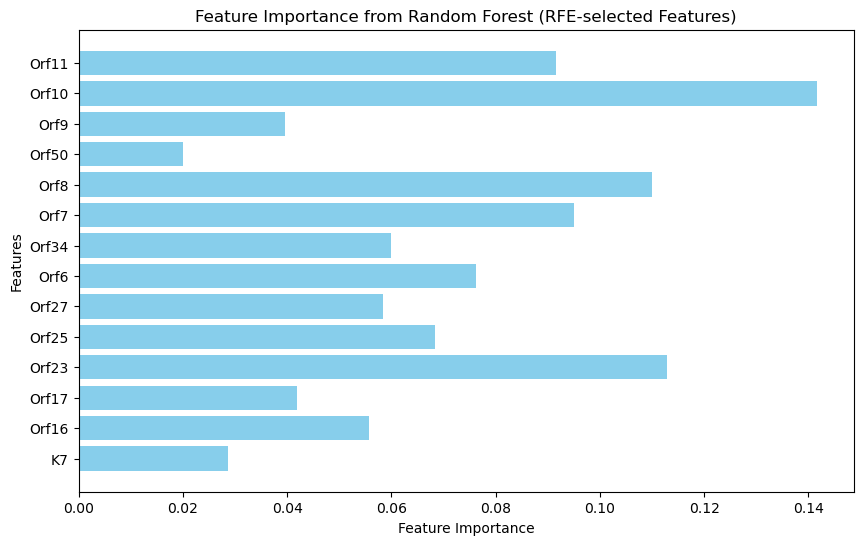

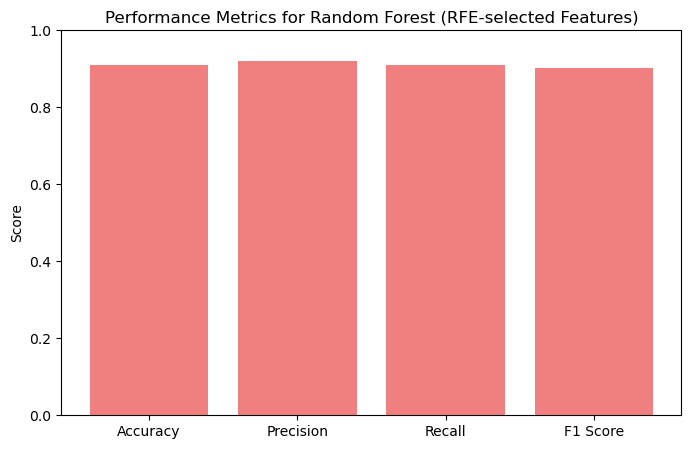

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

# Train a Random Forest model using the RFE-selected features
clf_rfe = RandomForestClassifier(random_state=42)
clf_rfe.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_rfe = clf_rfe.predict(X_test[selected_features])

# Calculate feature importances
feature_importances = clf_rfe.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest (RFE-selected Features)')
plt.show()

# Calculate performance metrics

accuracy = accuracy_score(y_test, y_pred_rfe)
precision = precision_score(y_test, y_pred_rfe, average='weighted')
recall = recall_score(y_test, y_pred_rfe, average='weighted')
f1 = f1_score(y_test, y_pred_rfe, average='weighted')

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='lightcoral')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest (RFE-selected Features)')
plt.show()

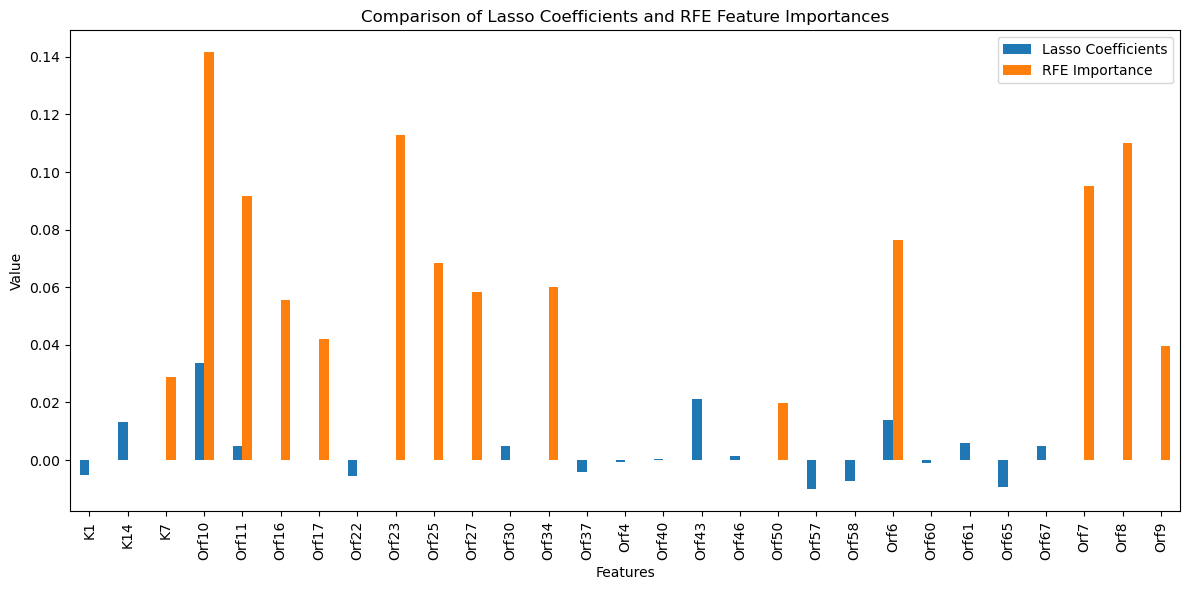

In [11]:
# Extract Lasso coefficients for the selected features
lasso_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Feature': selected_features.union(lasso_selected_features),
    'Lasso Coefficients': [lasso.coef_[X.columns.get_loc(feature)] if feature in lasso_selected_features else 0 for feature in selected_features.union(lasso_selected_features)],
    'RFE Importance': [feature_importances[selected_features.get_loc(feature)] if feature in selected_features else 0 for feature in selected_features.union(lasso_selected_features)]
})

# Plot the comparison
comparison_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Lasso Coefficients and RFE Feature Importances')
plt.ylabel('Value')
plt.xlabel('Features')
plt.legend(['Lasso Coefficients', 'RFE Importance'])
plt.tight_layout()
plt.show()

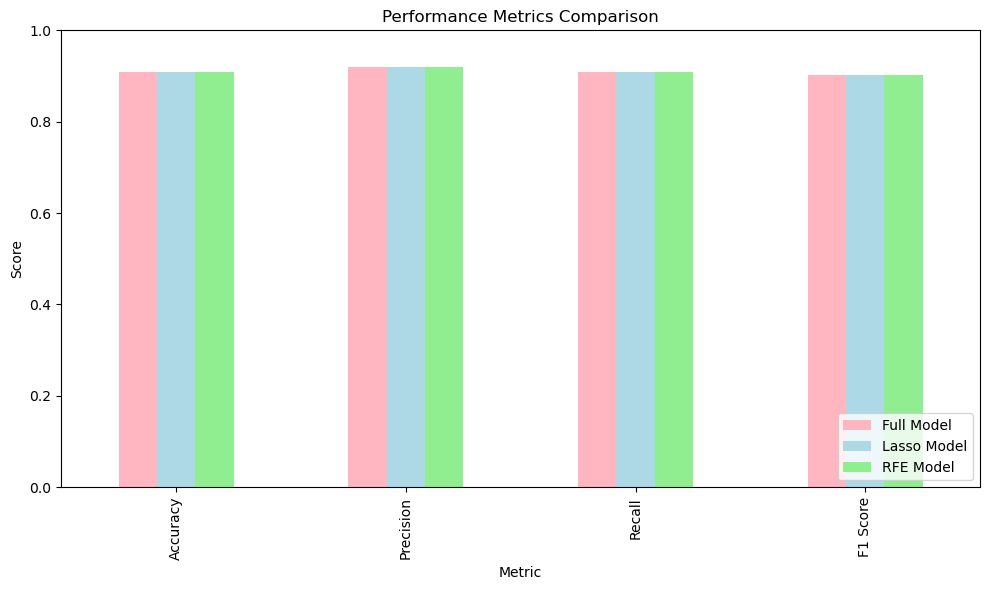

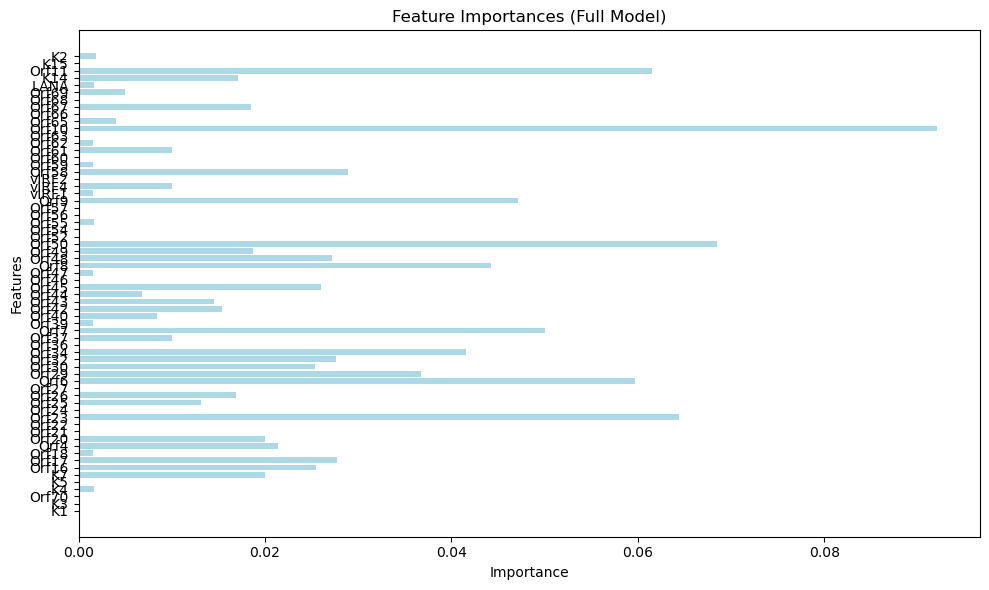

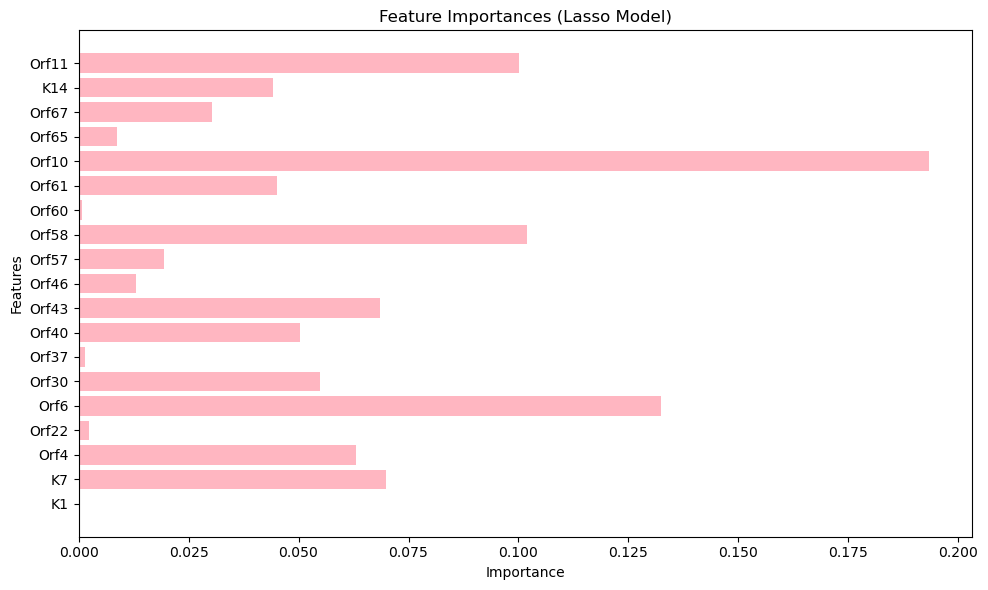

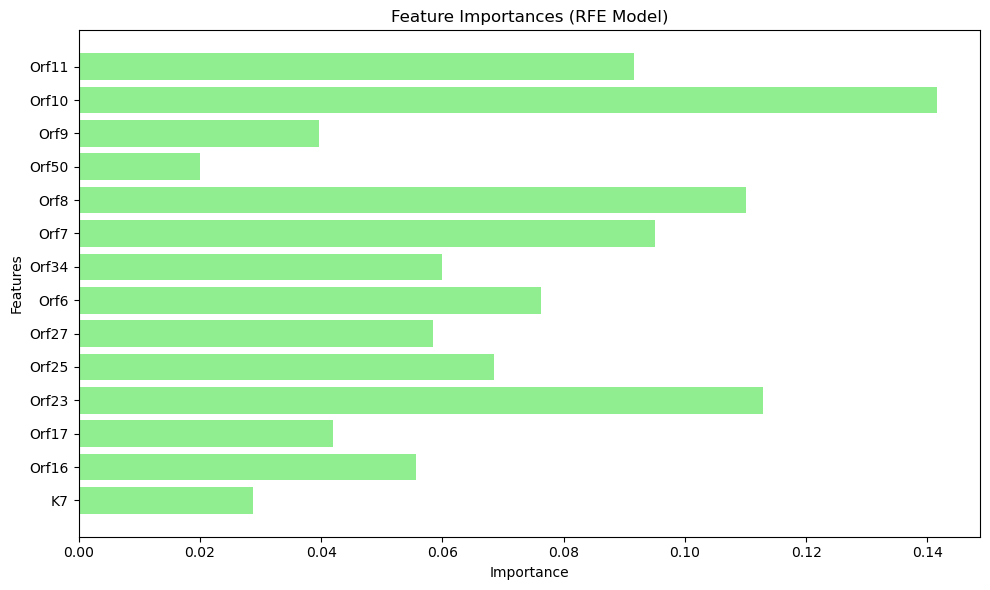

      Metric  Full Model  Lasso Model  RFE Model
0   Accuracy    0.909091     0.909091   0.909091
1  Precision    0.919192     0.919192   0.919192
2     Recall    0.909091     0.909091   0.909091
3   F1 Score    0.902674     0.902674   0.902674


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Initialize Random Forest models
rf_full = RandomForestClassifier(random_state=42)
rf_lasso = RandomForestClassifier(random_state=42)
rf_rfe = RandomForestClassifier(random_state=42)

# Train models
rf_full.fit(X_train, y_train)
rf_lasso.fit(X_train[lasso_selected_features], y_train)
rf_rfe.fit(X_train[selected_features], y_train)

# Predictions
y_pred_full = rf_full.predict(X_test)
y_pred_lasso = rf_lasso.predict(X_test[lasso_selected_features])
y_pred_rfe = rf_rfe.predict(X_test[selected_features])

# Performance metrics
metrics_full = [
    accuracy_score(y_test, y_pred_full),
    precision_score(y_test, y_pred_full, average='weighted'),
    recall_score(y_test, y_pred_full, average='weighted'),
    f1_score(y_test, y_pred_full, average='weighted')
]

metrics_lasso = [
    accuracy_score(y_test, y_pred_lasso),
    precision_score(y_test, y_pred_lasso, average='weighted'),
    recall_score(y_test, y_pred_lasso, average='weighted'),
    f1_score(y_test, y_pred_lasso, average='weighted')
]

metrics_rfe = [
    accuracy_score(y_test, y_pred_rfe),
    precision_score(y_test, y_pred_rfe, average='weighted'),
    recall_score(y_test, y_pred_rfe, average='weighted'),
    f1_score(y_test, y_pred_rfe, average='weighted')
]

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Full Model': metrics_full,
    'Lasso Model': metrics_lasso,
    'RFE Model': metrics_rfe
})

# Plot performance metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#FFB6C1', '#ADD8E6', '#90EE90'])
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Feature importance plots
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, rf_full.feature_importances_, color='lightblue')
plt.title('Feature Importances (Full Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(lasso_selected_features, rf_lasso.feature_importances_, color='lightpink')
plt.title('Feature Importances (Lasso Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(selected_features, rf_rfe.feature_importances_, color='lightgreen')
plt.title('Feature Importances (RFE Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display metrics table
print(metrics_df)

make clusters a string to change color palette

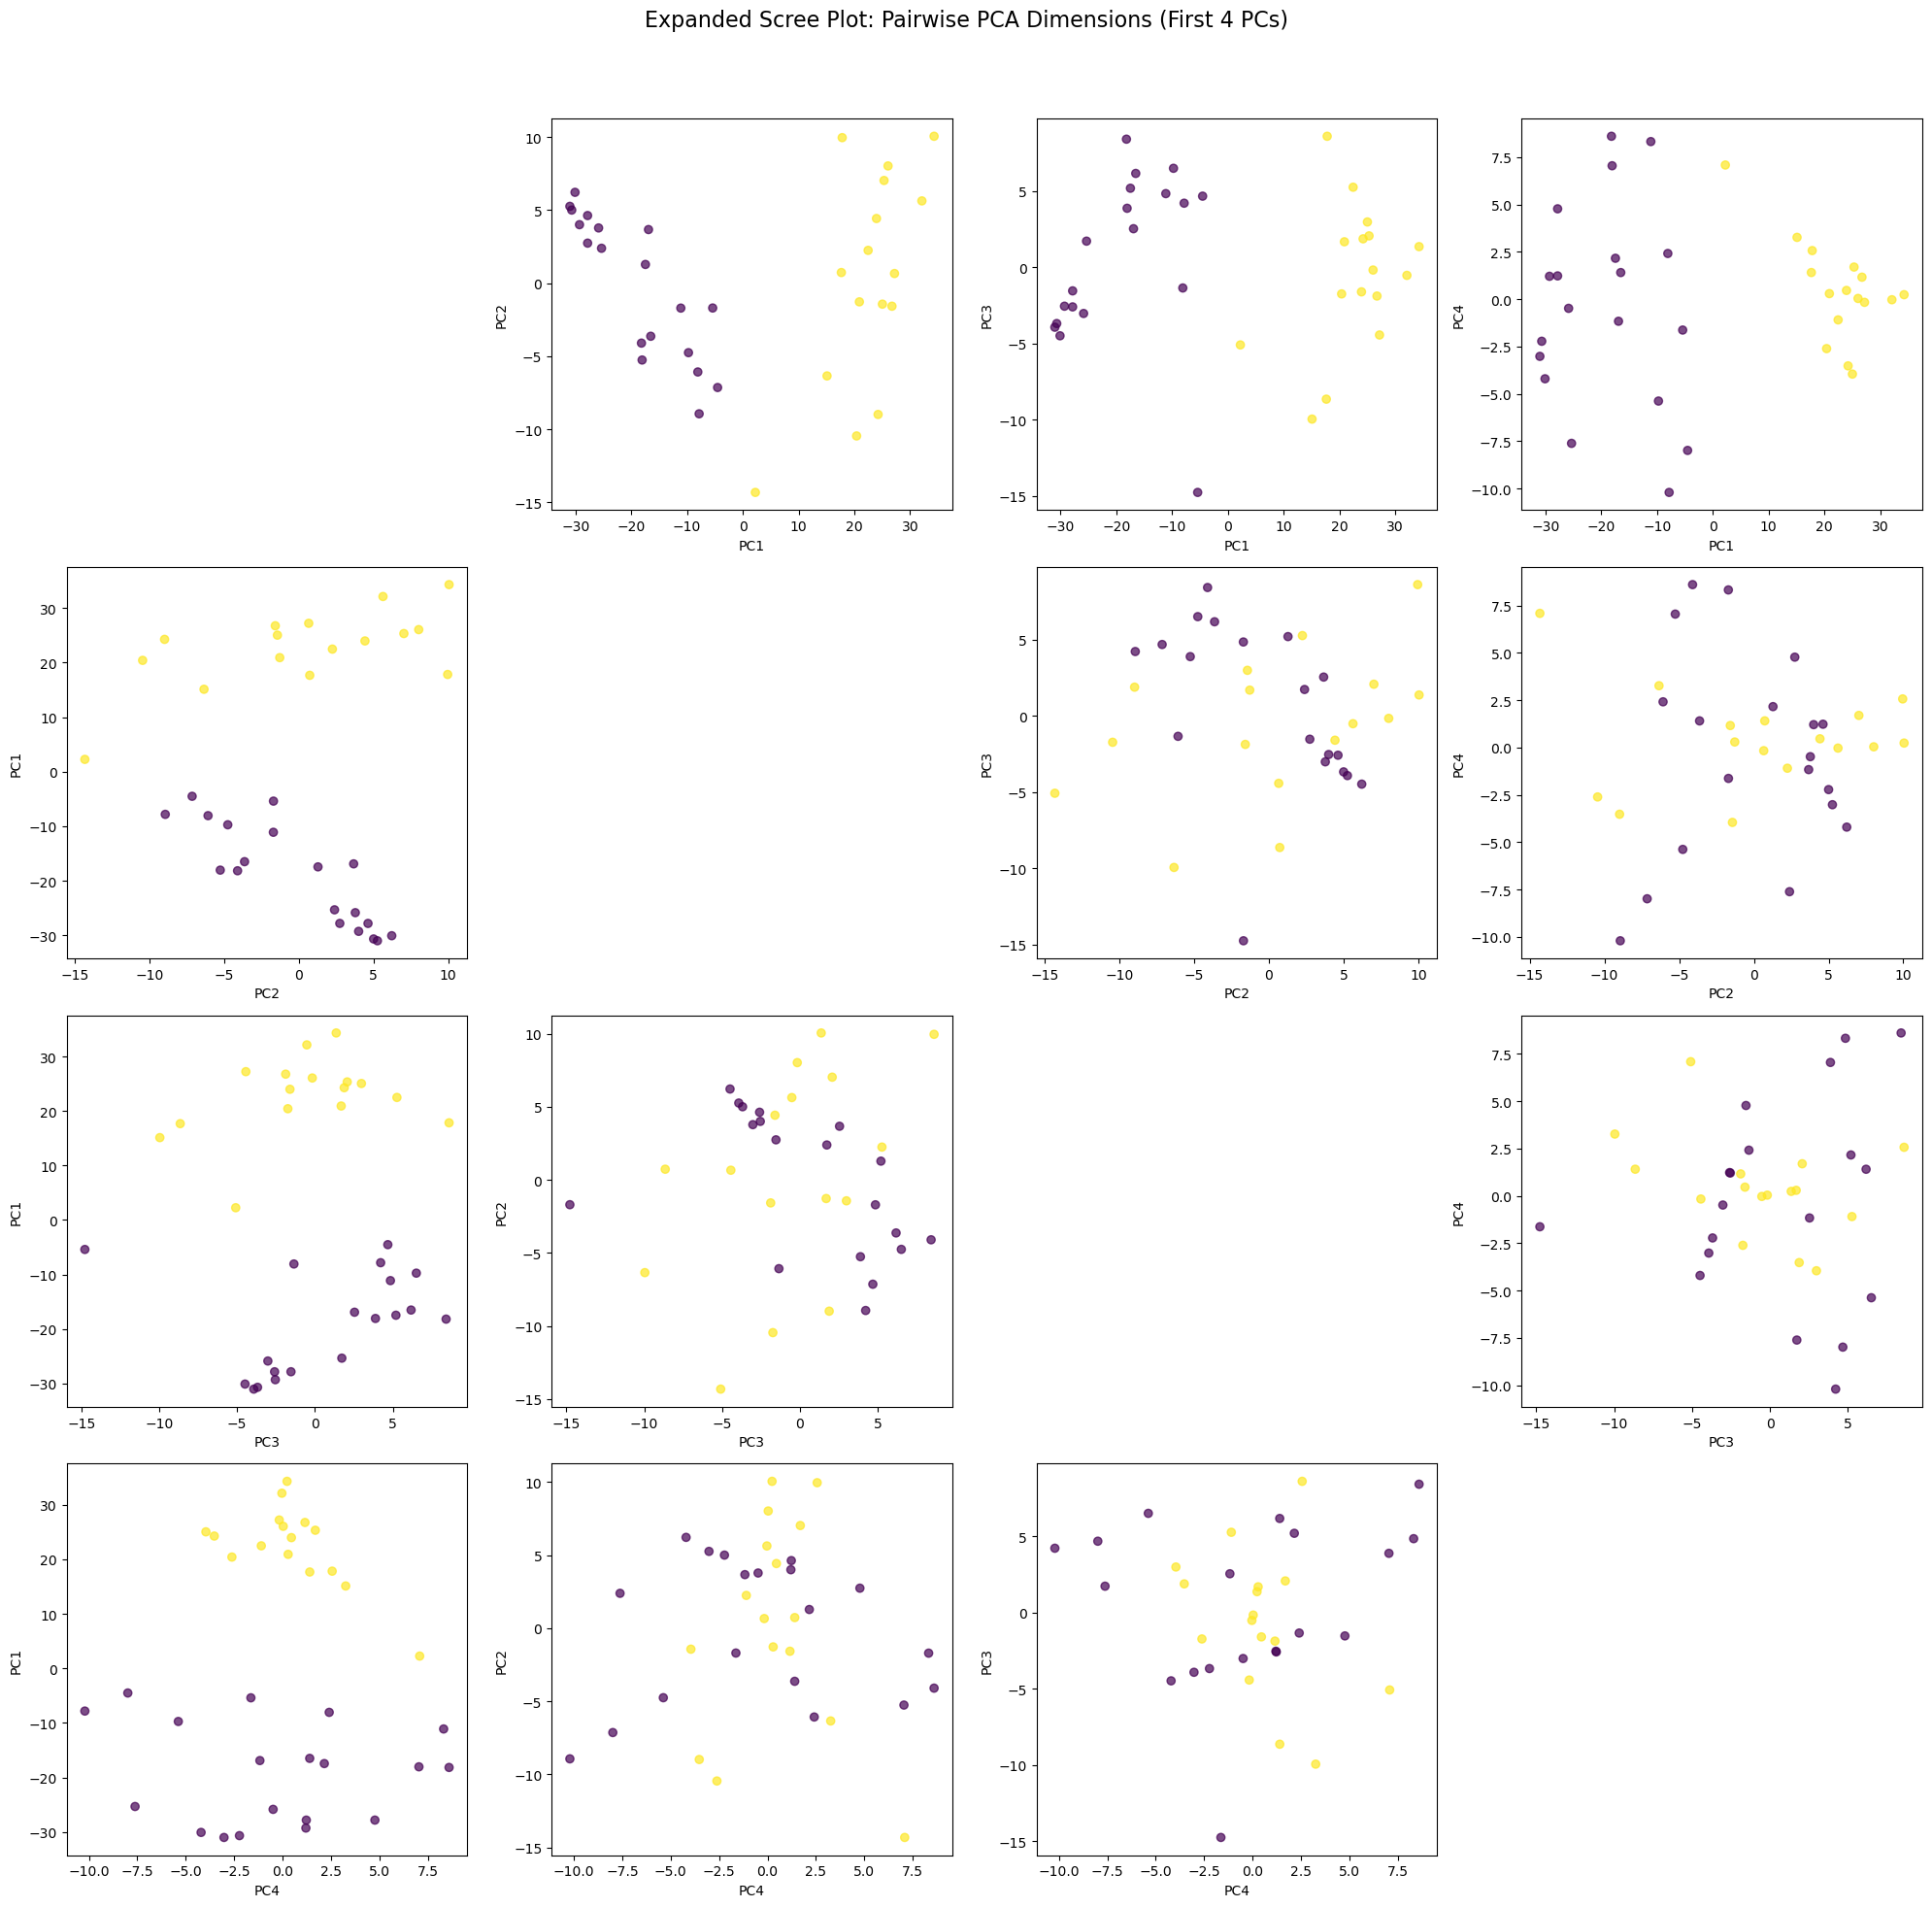

In [13]:
from sklearn.decomposition import PCA

# Perform PCA on the RFE-selected features
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X[selected_features])

# Create a DataFrame for the first 4 principal components
pca_df_first_four = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])

# Get the number of principal components to consider
num_pcs = 4

# Create a grid of subplots
fig, axes = plt.subplots(num_pcs, num_pcs, figsize=(20, 20), sharex=False, sharey=False)
fig.suptitle('Expanded Scree Plot: Pairwise PCA Dimensions (First 4 PCs)', fontsize=16)

# Plot each PC dimension against each other
for i in range(num_pcs):
    for j in range(num_pcs):
        if i != j:
            axes[i, j].scatter(pca_df_first_four.iloc[:, i], pca_df_first_four.iloc[:, j], c=y, cmap='viridis', alpha=0.7)
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')
        else:
            axes[i, j].axis('off')  # Turn off diagonal plots

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

use the lower PCs to find outliers

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


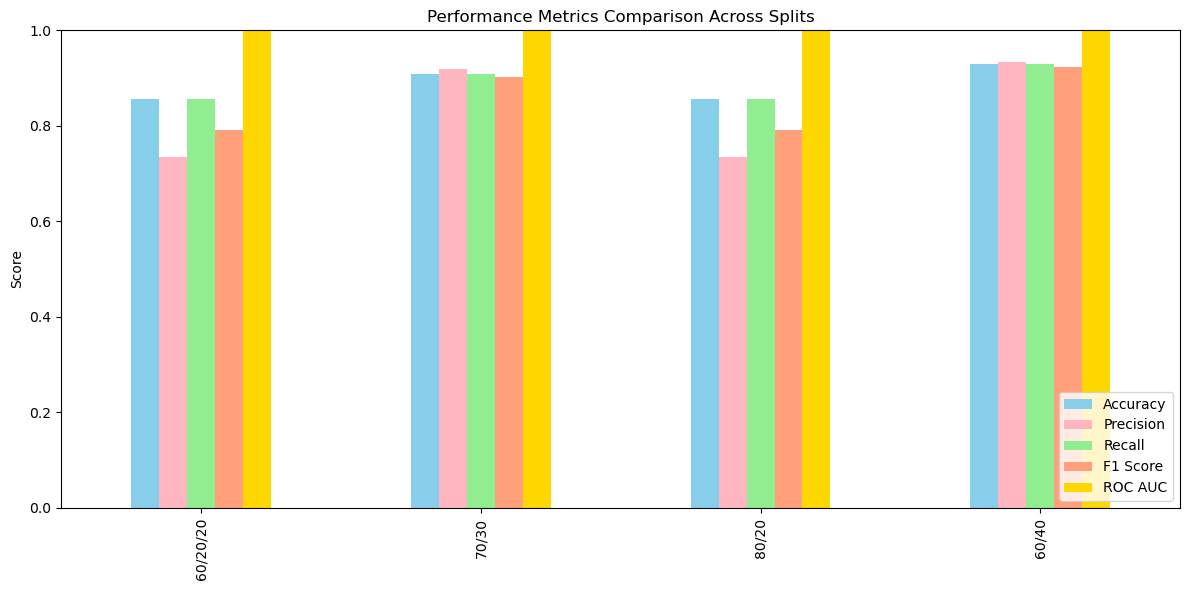

      Metric  60/20/20     70/30     80/20     60/40
0   Accuracy  0.857143  0.909091  0.857143  0.928571
1  Precision  0.734694  0.919192  0.734694  0.934524
2     Recall  0.857143  0.909091  0.857143  0.928571
3   F1 Score  0.791209  0.902674  0.791209  0.922981
4    ROC AUC  1.000000  1.000000  1.000000  1.000000


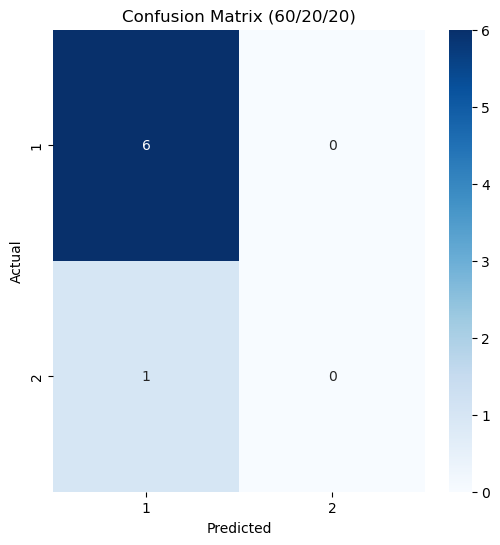

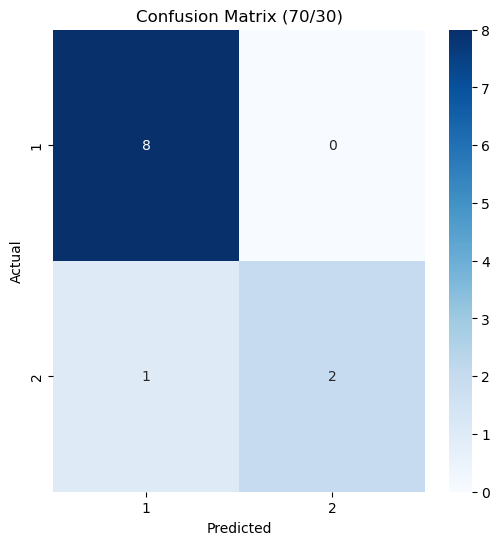

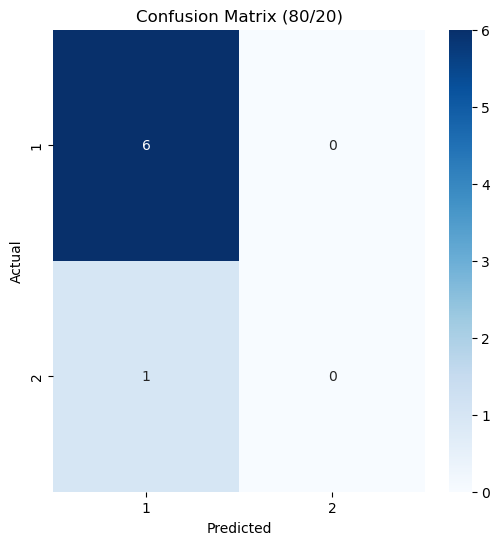

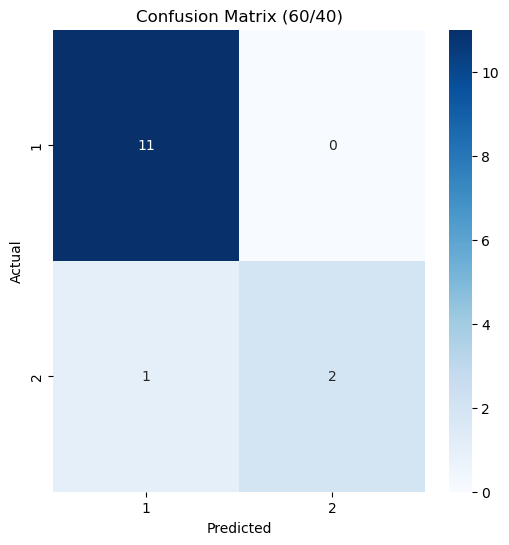

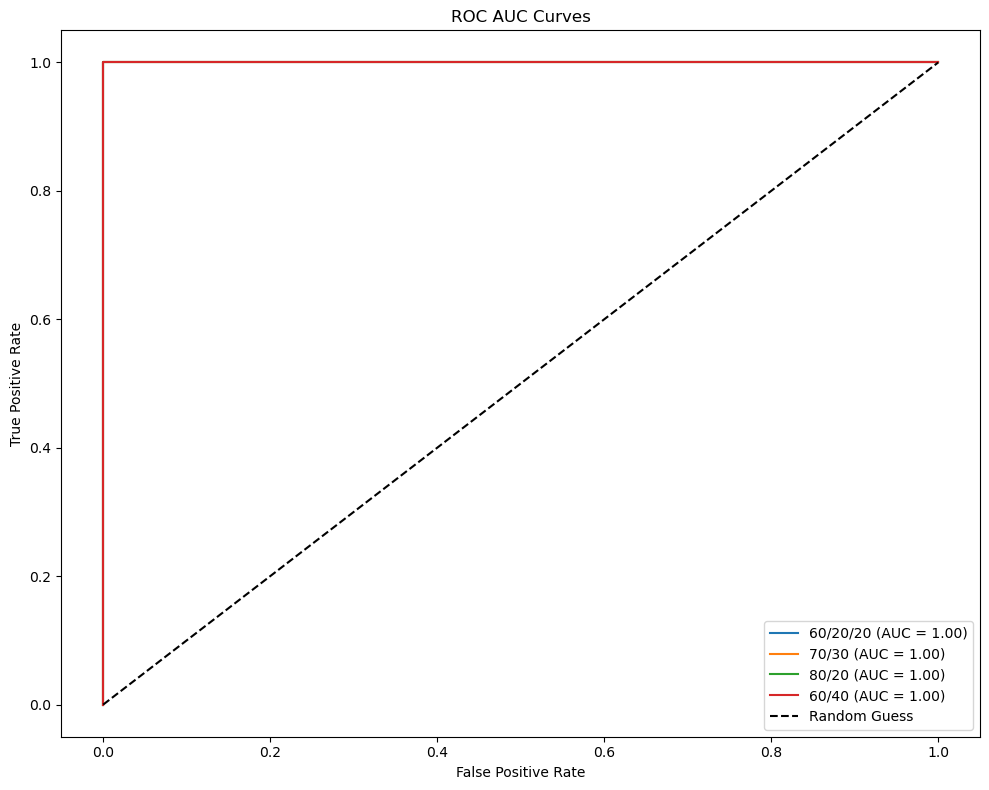

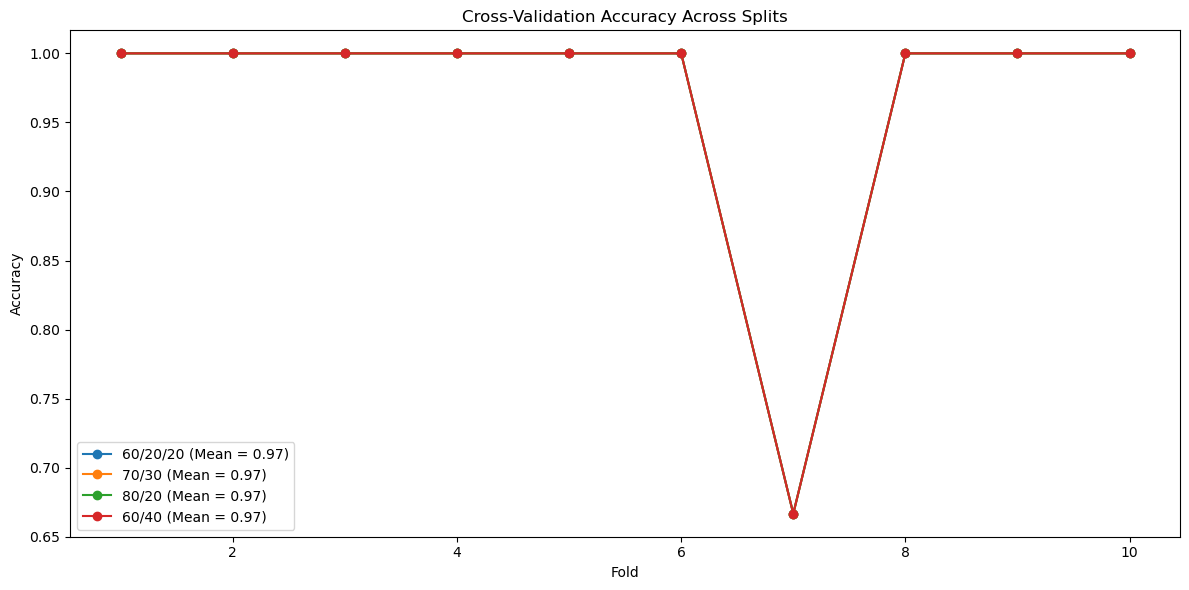

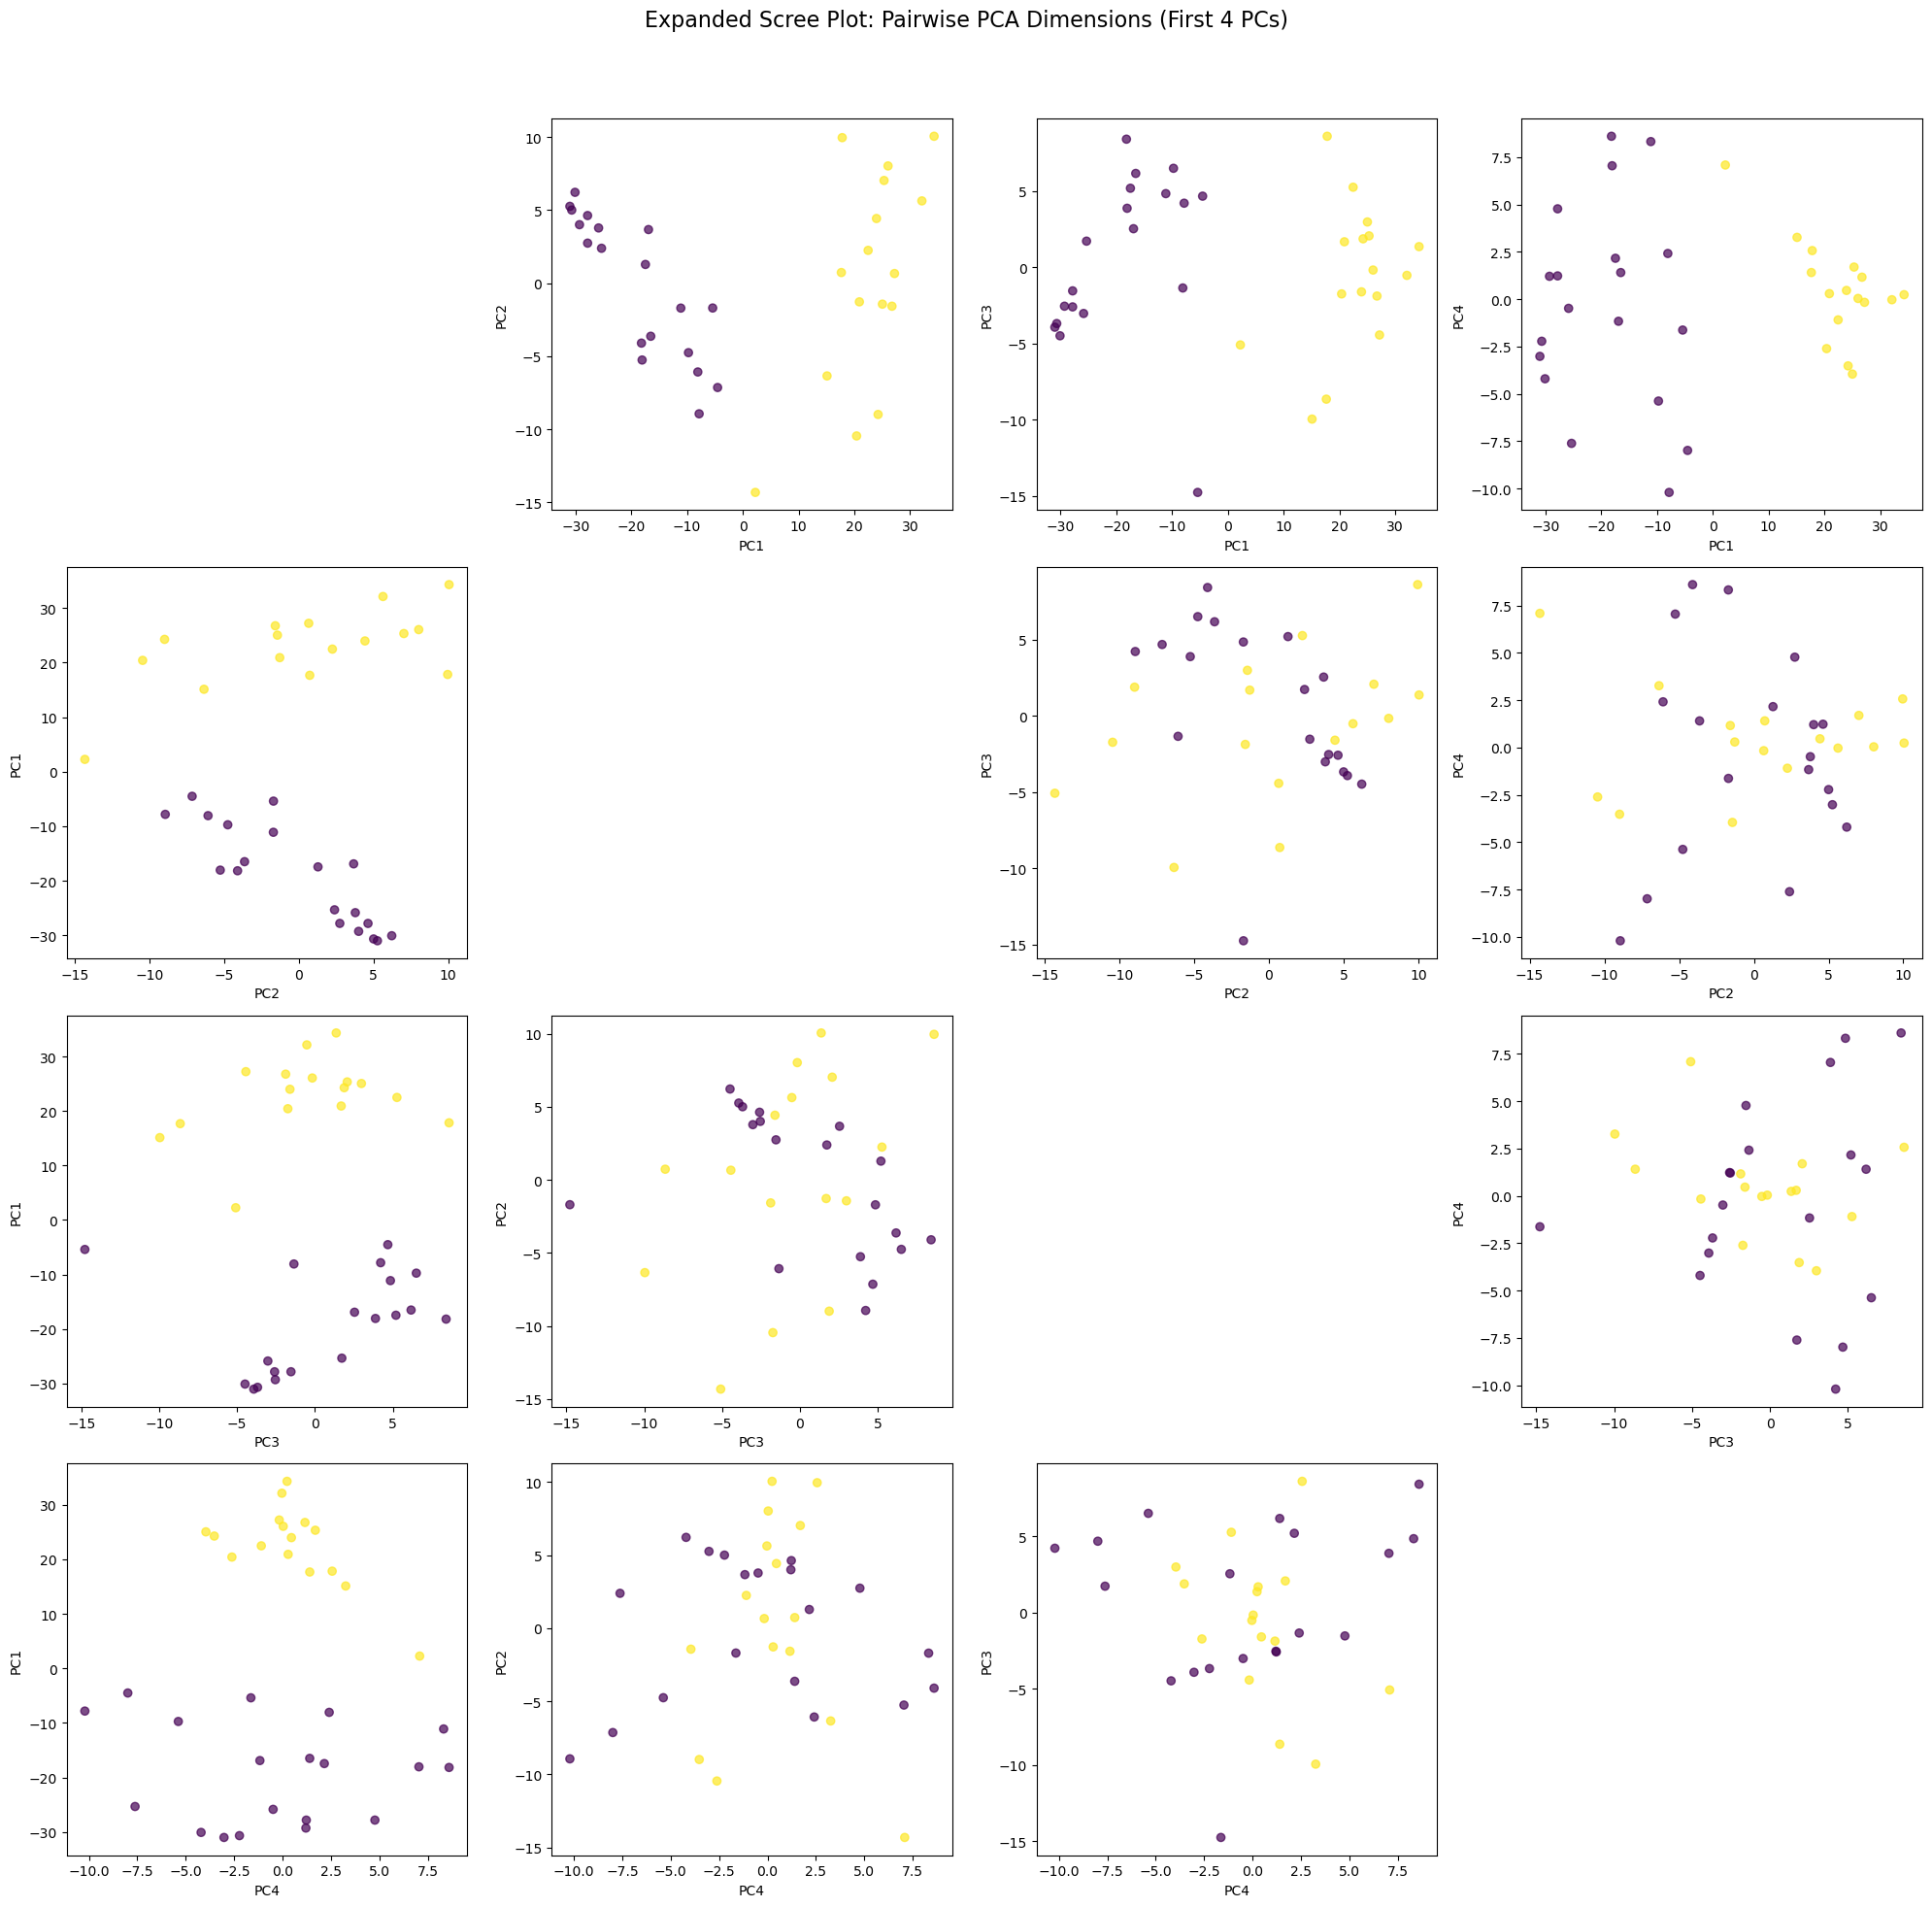

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

import matplotlib.pyplot as plt

# Define train-test splits
splits = {
    "60/20/20": (0.6, 0.2),
    "70/30": (0.7, 0.3),
    "80/20": (0.8, 0.2),
    "60/40": (0.6, 0.4)
}

# Store performance metrics
metrics_dict = {}
confusion_matrices = {}
roc_curves = {}
cv_scores_dict = {}

# Loop through each split
for split_name, (train_size, test_size) in splits.items():
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, train_size=train_size, test_size=test_size, random_state=42
    )
    
    # Train a Random Forest model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = auc(*roc_curve((y_test == y.unique()[1]).astype(int), y_proba)[:2])
    
    # Store metrics
    metrics_dict[split_name] = [accuracy, precision, recall, f1, roc_auc]
    confusion_matrices[split_name] = confusion_matrix(y_test, y_pred)
    roc_curves[split_name] = roc_curve((y_test == y.unique()[1]).astype(int), y_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(clf, X[selected_features], y, cv=10, scoring='accuracy')
    cv_scores_dict[split_name] = cv_scores

# Create a DataFrame for metrics
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Plot performance metrics
metrics_df.plot(kind='bar', figsize=(12, 6), color=['#87CEEB', '#FFB6C1', '#90EE90', '#FFA07A', '#FFD700'])
plt.title('Performance Metrics Comparison Across Splits')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Create a DataFrame for performance metrics
performance_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    '60/20/20': metrics_dict['60/20/20'],
    '70/30': metrics_dict['70/30'],
    '80/20': metrics_dict['80/20'],
    '60/40': metrics_dict['60/40']
})

# Display the table
print(performance_metrics_df)

# Plot confusion matrices
for split_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix ({split_name})')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot ROC AUC curves
plt.figure(figsize=(10, 8))
for split_name, (fpr, tpr, _) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{split_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
for split_name, cv_scores in cv_scores_dict.items():
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label=f'{split_name} (Mean = {cv_scores.mean():.2f})')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Across Splits')
plt.legend()
plt.tight_layout()
plt.show()

# Expanded scree plot of pairwise PCA dimensions
fig, axes = plt.subplots(num_pcs, num_pcs, figsize=(20, 20), sharex=False, sharey=False)
fig.suptitle('Expanded Scree Plot: Pairwise PCA Dimensions (First 4 PCs)', fontsize=16)

for i in range(num_pcs):
    for j in range(num_pcs):
        if i != j:
            axes[i, j].scatter(pca_df_first_four.iloc[:, i], pca_df_first_four.iloc[:, j], c=y, cmap='viridis', alpha=0.7)
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')
        else:
            axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfe_features_df, x='Cluster', y

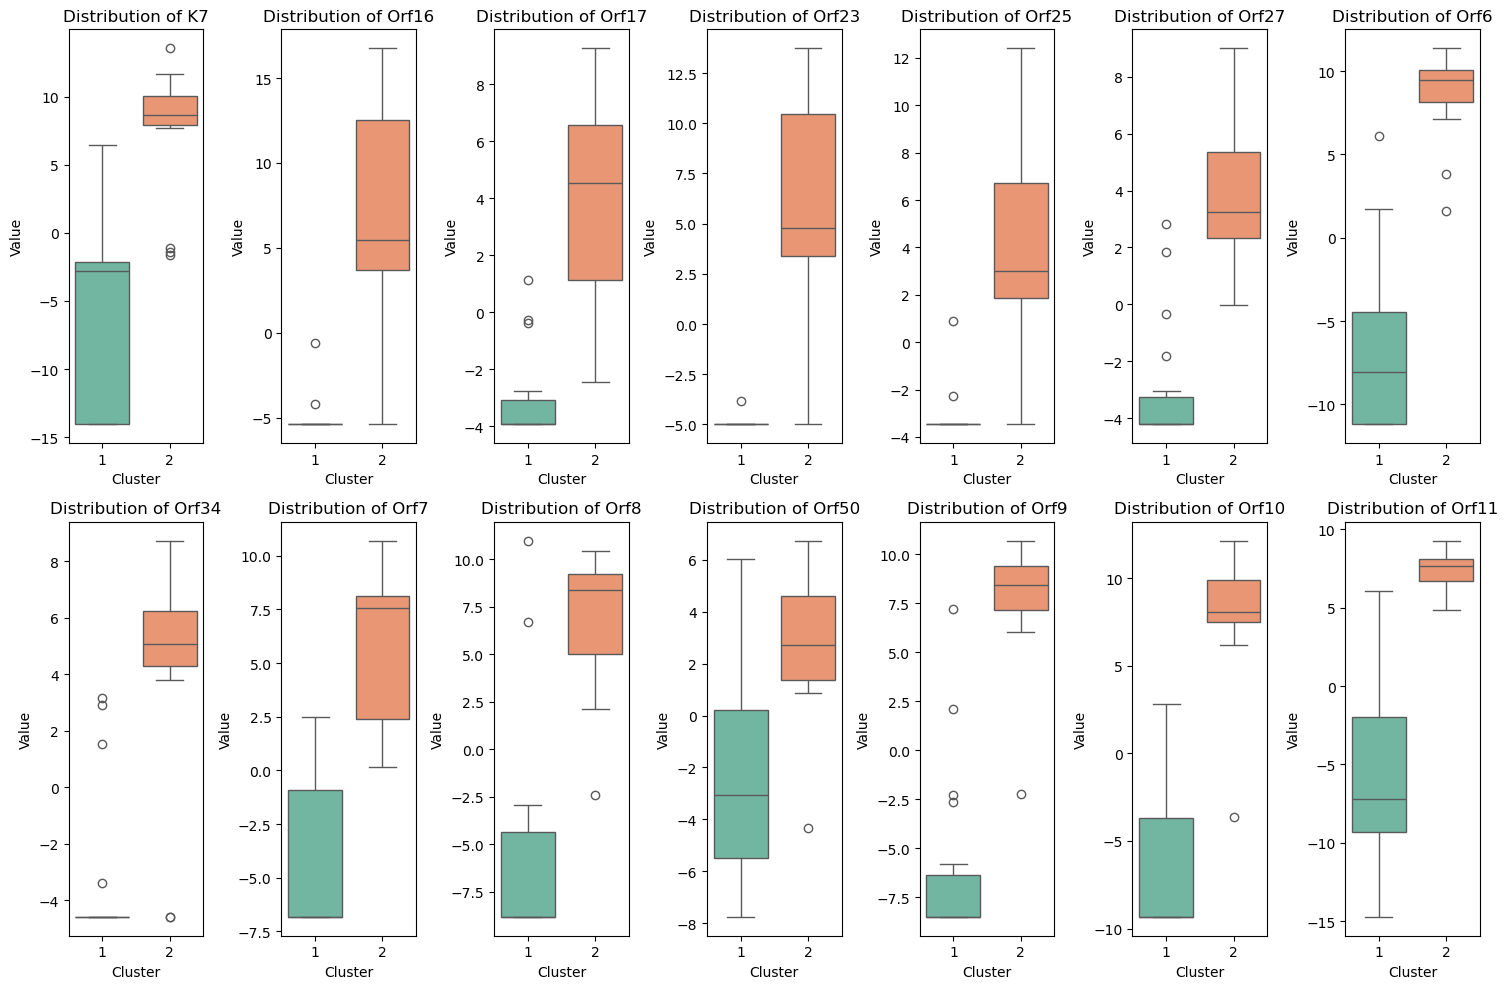

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_73641/1787357046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.vi

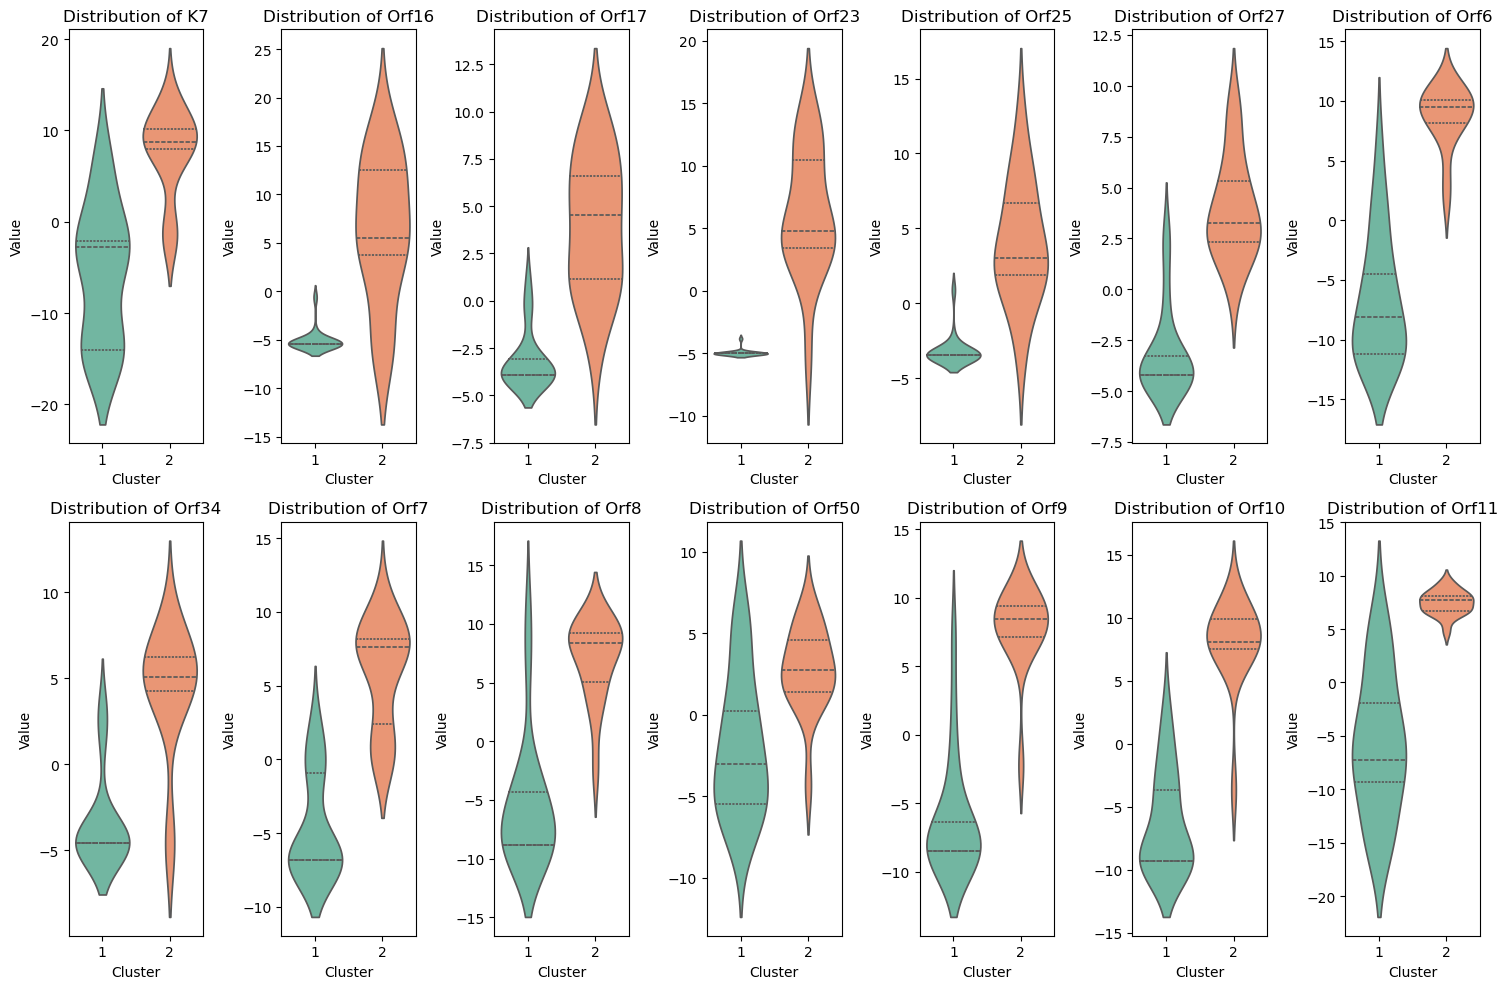

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Combine the selected features and target variable into a single DataFrame
rfe_features_df = X[selected_features].copy()
rfe_features_df['Cluster'] = y

# Plot boxplots for each feature grouped by class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 7, i)  # Create a grid of 2 rows and 7 columns
    sns.boxplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Alternatively, use violin plots for a more detailed visualization
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 7, i)  # Create a grid of 2 rows and 7 columns
    sns.violinplot(data=rfe_features_df, x='Cluster', y=feature, palette='Set2', inner='quartile')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [17]:
# Set a correlation threshold
correlation_threshold = 0.90

# Compute the correlation matrix
correlation_matrix = df_modeling.corr()

# Find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_features.append(feature_pair)

# Print the highly correlated feature pairs
print("Highly Correlated Features (Correlation > {}):".format(correlation_threshold))
for pair in highly_correlated_features:
    print(pair)

Highly Correlated Features (Correlation > 0.9):
('Orf10', 'Orf6')


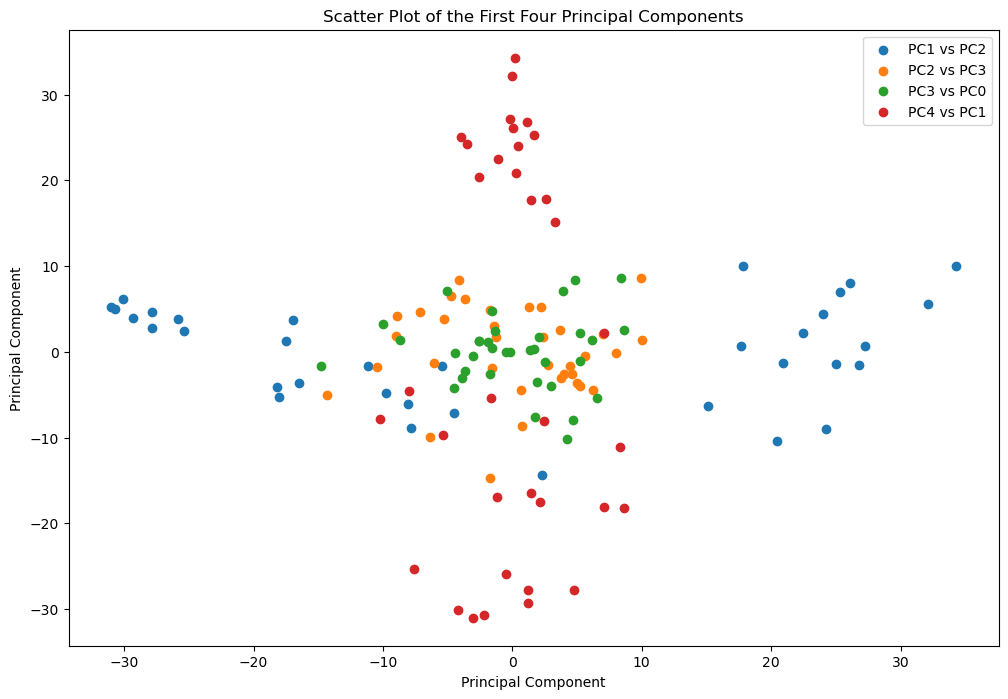

In [20]:
# Plot the first four principal components
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.scatter(pca_df_first_four.iloc[:, i], pca_df_first_four.iloc[:, (i + 1) % 4], label=f'PC{i+1} vs PC{(i+2) % 4}')
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.title('Scatter Plot of the First Four Principal Components')
plt.legend()
plt.show()